# To Build a Prediction model to predict the price of ticket from one city to another.

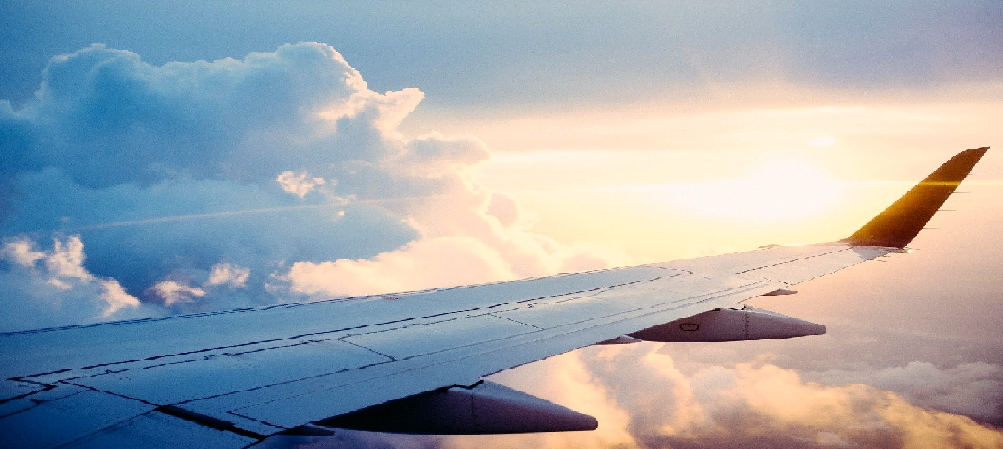

In [33]:
# importing the necessaru package and creating the test and train data sets
import pandas as pd

training_set = pd.read_excel("Data_Train.xlsx")
test_set = pd.read_excel("Test_set.xlsx")
test_label = pd.read_excel("Final_Pred.xlsx")


In [34]:
training_set.head() # seeing how the training data looks

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [35]:
# priniting the details about the datasets

print("\nEDA on Training Set\n")
print("#"*30)

print("\nFeatures/Columns : \n", training_set.columns)
print("\n\nNumber of Features/Columns : ", len(training_set.columns))
print("\nNumber of Rows : ",len(training_set))
print("\n\nData Types :\n", training_set.dtypes)

print("\n Contains NaN/Empty cells : ", training_set.isnull().values.any())

print("\n Total empty cells by column :\n", training_set.isnull().sum(), "\n\n")


# Test Set
print("#"*30)
print("\nEDA on Test Set\n")
print("#"*30)


print("\nFeatures/Columns : \n",test_set.columns)
print("\n\nNumber of Features/Columns : ",len(test_set.columns))
print("\nNumber of Rows : ",len(test_set))
print("\n\nData Types :\n", test_set.dtypes)
print("\n Contains NaN/Empty cells : ", test_set.isnull().values.any())
print("\n Total empty cells by column :\n", test_set.isnull().sum())


EDA on Training Set

##############################

Features/Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Number of Features/Columns :  11

Number of Rows :  10683


Data Types :
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 


##############################

EDA on Test

In [36]:

print("Original Length of Training Set : ", len(training_set))

training_set = training_set.dropna() # dropping the NaN value.  we chose to drop it as there is only one NaN value. 

print("Length of Training Set after dropping NaN: ", len(training_set))

Original Length of Training Set :  10683
Length of Training Set after dropping NaN:  10682


This means that there was only one row having missing values which we have removed

In [37]:
from pandas_profiling import ProfileReport
ProfileReport(training_set)

C:\ds\Anconda3\lib\site-packages\pandas_profiling\describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,10682
Total Missing (%),0.0%
Total size in memory,1001.6 KiB
Average record size in memory,96.0 B
Numeric,2
Categorical,10
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### converting the data type to data-time format and adding new columns

In [38]:
training_set['Journey_Day'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.day
training_set.head() # cheking the dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1


In [39]:
training_set['Journey_Month'] = pd.to_datetime(training_set.Date_of_Journey, format='%d/%m/%Y').dt.month
training_set.head() # cheking the dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [40]:
# Test Set
test_set['Journey_Day'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.day
test_set['Journey_Month'] = pd.to_datetime(test_set.Date_of_Journey, format='%d/%m/%Y').dt.month
test_set.head() # cheking the test dataset after transformation

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [41]:
# Compare the dates and delete the original date feature

training_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print('training set after transformation')
display(training_set.head())
        


training set after transformation


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [42]:
test_set.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)
print('test set after transformation')
display(test_set.head())

test set after transformation


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Journey_Day,Journey_Month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [43]:
training_set.info() # checking the data types of all the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
Airline            10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
Journey_Day        10682 non-null int64
Journey_Month      10682 non-null int64
dtypes: int64(3), object(9)
memory usage: 1.1+ MB


In [44]:
#Our duration column had time written in this format 2h 50m . 
#To help machine learning algorithm derive useful insights, we will convert this text into numeric.


duration = list(training_set['Duration'])


for i in range(len(duration)) :
    if len(duration[i].split()) != 2: 
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1])) #for examole if duration is 2h 40m, then duration_hour will be 2
    dur_minutes.append(int(duration[i].split()[1][:-1]))# 40m as 40
    
training_set['Duration_hours'] = dur_hours
training_set['Duration_minutes'] =dur_minutes

training_set.drop(labels = 'Duration', axis = 1, inplace = True) # dropping the original duration column from training set


# Test Set(applyig same code to convert 'Duration' to 'Duration _Hours' and 'Duration_Minutes')
#2h 50m
durationT = list(test_set['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()[0]) != 2:       
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    #print(durationT[i].split())
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    if(len(durationT[i].split())>1):
        dur_minutes.append(int(durationT[i].split()[1][:-1]))
    else:
        dur_minutes.append(int(0))
  
    
test_set['Duration_hours'] = dur_hours
test_set['Duration_minutes'] = dur_minutes

test_set.drop(labels = 'Duration', axis = 1, inplace = True) #  dropping the original duration column from training set

In [45]:
training_set.info() # checking the data types of all the columns once again. 'Duration_hours' and 'Duration_minutes' are integer type columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
Airline             10682 non-null object
Source              10682 non-null object
Destination         10682 non-null object
Route               10682 non-null object
Dep_Time            10682 non-null object
Arrival_Time        10682 non-null object
Total_Stops         10682 non-null object
Additional_Info     10682 non-null object
Price               10682 non-null int64
Journey_Day         10682 non-null int64
Journey_Month       10682 non-null int64
Duration_hours      10682 non-null int64
Duration_minutes    10682 non-null int64
dtypes: int64(5), object(8)
memory usage: 1.1+ MB


In [46]:
#Converting 'Dep_Time' to 'Depart_Time_hour' and 'Depart_time_Minutes'
training_set['Depart_Time_Hour'] = pd.to_datetime(training_set.Dep_Time).dt.hour
training_set['Depart_Time_Minutes'] = pd.to_datetime(training_set.Dep_Time).dt.minute

training_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)

training_set.head() # cheking the training set after transformation

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,2 stops,No info,7662,1,5,7,25,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,1 stop,No info,6218,12,5,5,25,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,1 stop,No info,13302,1,3,4,45,16,50


In [47]:
#Converting 'Arr_Time' to 'Arr_Time_hour' and 'Arr_time_Minutes' and dropping the original column
training_set['Arr_Time_Hour'] = pd.to_datetime(training_set.Arrival_Time).dt.hour
training_set['Arr_Time_Minutes'] = pd.to_datetime(training_set.Arrival_Time).dt.minute

training_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
training_set.head() # cheking the training set after transformation

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [48]:
# applying the same to test set
test_set['Depart_Time_Hour'] = pd.to_datetime(test_set.Dep_Time).dt.hour
test_set['Depart_Time_Minutes'] = pd.to_datetime(test_set.Dep_Time).dt.minute


test_set.drop(labels = 'Dep_Time', axis = 1, inplace = True)
test_set.head() # cheking the test set after transformation

,Airline,Source,Destination,Route,Arrival_Time,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,04:25 07 Jun,1 stop,No info,6,6,10,55,17,30
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,10:20,1 stop,No info,12,5,4,0,6,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:00 22 May,1 stop,In-flight meal not included,21,5,23,45,19,15
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,21:00,1 stop,No info,21,5,13,0,8,0
4,Air Asia,Banglore,Delhi,BLR → DEL,02:45 25 Jun,non-stop,No info,24,6,2,50,23,55


In [49]:
test_set['Arr_Time_Hour'] = pd.to_datetime(test_set.Arrival_Time).dt.hour
test_set['Arr_Time_Minutes'] = pd.to_datetime(test_set.Arrival_Time).dt.minute

test_set.drop(labels = 'Arrival_Time', axis = 1, inplace = True)
test_set.head() # cheking the test set after transformation

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [50]:

Y_train = training_set.iloc[:,6].values  # 6 is the index of "Price" in the Training Set , setting it as the label column

# Independent Variables
X_train = training_set.iloc[:,training_set.columns != 'Price'].values # selects all columns except "Price"

# Independent Variables for Test Set
X_test = test_set.iloc[:,:].values

X_train

array([['IndiGo', 'Banglore', 'New Delhi', ..., 20, 1, 10],
       ['Air India', 'Kolkata', 'Banglore', ..., 50, 13, 15],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 25, 4, 25],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 20, 11, 20],
       ['Vistara', 'Banglore', 'New Delhi', ..., 30, 14, 10],
       ['Air India', 'Delhi', 'Cochin', ..., 55, 19, 15]], dtype=object)

In [51]:
Y_test = test_label.iloc[:].values  

# Independent Variables for Test Set
X_test = test_set.iloc[:,:].values

Y_test

array([[10547.00207684],
       [ 6773.63578023],
       [11482.73266957],
       ...,
       [12215.6046993 ],
       [ 8517.75431907],
       [10270.26137297]])

In [52]:
# From the info above it could be observed that many colmns are of object type. So, converting those categorical columns to numerical columns
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

### Training Set 

In [53]:
X_train[:,0] = le1.fit_transform(X_train[:,0])
X_train

array([[3, 'Banglore', 'New Delhi', ..., 20, 1, 10],
       [1, 'Kolkata', 'Banglore', ..., 50, 13, 15],
       [4, 'Delhi', 'Cochin', ..., 25, 4, 25],
       ...,
       [4, 'Banglore', 'Delhi', ..., 20, 11, 20],
       [10, 'Banglore', 'New Delhi', ..., 30, 14, 10],
       [1, 'Delhi', 'Cochin', ..., 55, 19, 15]], dtype=object)

In [54]:
X_train[:,1] = le1.fit_transform(X_train[:,1])
X_train

array([[3, 0, 'New Delhi', ..., 20, 1, 10],
       [1, 3, 'Banglore', ..., 50, 13, 15],
       [4, 2, 'Cochin', ..., 25, 4, 25],
       ...,
       [4, 0, 'Delhi', ..., 20, 11, 20],
       [10, 0, 'New Delhi', ..., 30, 14, 10],
       [1, 2, 'Cochin', ..., 55, 19, 15]], dtype=object)

In [55]:
X_train[:,2] = le1.fit_transform(X_train[:,2])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [56]:
X_train[:,3] = le1.fit_transform(X_train[:,3])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [57]:
X_train[:,4] = le1.fit_transform(X_train[:,4])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

In [58]:
X_train[:,5] = le1.fit_transform(X_train[:,5])
X_train

array([[3, 0, 5, ..., 20, 1, 10],
       [1, 3, 0, ..., 50, 13, 15],
       [4, 2, 1, ..., 25, 4, 25],
       ...,
       [4, 0, 2, ..., 20, 11, 20],
       [10, 0, 5, ..., 30, 14, 10],
       [1, 2, 1, ..., 55, 19, 15]], dtype=object)

### Applying  similar operations on the Test Set

In [59]:
X_test[:,0] = le2.fit_transform(X_test[:,0])

X_test[:,1] = le2.fit_transform(X_test[:,1])

X_test[:,2] = le2.fit_transform(X_test[:,2])

X_test[:,3] = le2.fit_transform(X_test[:,3])

X_test[:,4] = le2.fit_transform(X_test[:,4])

X_test[:,5] = le2.fit_transform(X_test[:,5])
X_test

array([[4, 2, 1, ..., 30, 4, 25],
       [3, 3, 0, ..., 20, 10, 20],
       [4, 2, 1, ..., 15, 19, 0],
       ...,
       [4, 2, 1, ..., 50, 4, 25],
       [1, 2, 1, ..., 0, 19, 15],
       [6, 2, 1, ..., 55, 19, 15]], dtype=object)

In [60]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

In [61]:
X_train = sc_X.fit_transform(X_train)
X_train

array([[-0.41080484, -1.65835945,  2.41653414, ..., -0.2349499 ,
        -1.80043628, -0.8900139 ],
       [-1.26115217,  0.89001433, -0.97381203, ...,  1.36360731,
        -0.05090913, -0.5870944 ],
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  0.0314763 ,
        -1.3630545 ,  0.0187446 ],
       ...,
       [ 0.01436882, -1.65835945,  0.38232644, ..., -0.2349499 ,
        -0.34249699, -0.2841749 ],
       [ 2.56541078, -1.65835945,  2.41653414, ...,  0.2979025 ,
         0.0948848 , -0.8900139 ],
       [-1.26115217,  0.04055641, -0.2957428 , ...,  1.63003351,
         0.82385444, -0.5870944 ]])

In [62]:
X_test = sc_X.transform(X_test)
X_test

array([[ 0.01436882,  0.04055641, -0.2957428 , ...,  0.2979025 ,
        -1.3630545 ,  0.0187446 ],
       [-0.41080484,  0.89001433, -0.97381203, ..., -0.2349499 ,
        -0.48829092, -0.2841749 ],
       [ 0.01436882,  0.04055641, -0.2957428 , ..., -0.5013761 ,
         0.82385444, -1.4958529 ],
       ...,
       [ 0.01436882,  0.04055641, -0.2957428 , ...,  1.36360731,
        -1.3630545 ,  0.0187446 ],
       [-1.26115217,  0.04055641, -0.2957428 , ..., -1.30065471,
         0.82385444, -0.5870944 ],
       [ 0.86471614,  0.04055641, -0.2957428 , ...,  1.63003351,
         0.82385444, -0.5870944 ]])

In [63]:
# applying similar operation on the Y labels
Y_train = Y_train.reshape((len(Y_train), 1)) 
Y_train = sc_X.fit_transform(Y_train)
Y_train = Y_train.ravel()
Y_train


array([-1.12553455, -0.30906781,  1.03978296, ..., -0.40296691,
        0.77218138,  0.57809433])

In [64]:
Y_test = Y_test.reshape((len(Y_test), 1)) 
Y_test = sc_X.fit_transform(Y_test)
Y_test = Y_test.ravel()
Y_test

array([ 0.61181704, -0.52942533,  0.89482572, ...,  1.11648048,
       -0.00192234,  0.52811772])

 We have our training and test data sets seperated which can be used to build a machine learning model now.

1. Using KNN Regressor 

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
import math
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [66]:
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [67]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(n_neighbors=3)


{'n_neighbors': 3}

In [68]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

In [69]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_train, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.32185701087377927
R-squared:  0.8964080645513959


In [70]:
print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))

Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  0.5648530359076418
R-squared:  0.6809410478259204


2.Ridge Regressor

In [71]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(X_train , Y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [72]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=100)


{'alpha': 100}

In [73]:
y_train_pred =ridge_regressor.predict(X_train) ##Predict train result
y_test_pred =ridge_regressor.predict(X_test) ##Predict test result

In [74]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_train, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7602221917155026
R-squared:  0.4220622192232776


In [75]:
print("Test Results for Ridge Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))

Test Results for Ridge Regressor Model:
--------------------------------------------------
Root mean squared error:  0.6323864372395236
R-squared:  0.6000873939955023


3.Lasso Regressor

In [76]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(X_train ,Y_train)

GridSearchCV(cv=15, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             scoring='neg_mean_absolute_error')

In [77]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=0.01)


{'alpha': 0.01}

In [78]:
y_train_pred =lasso_regressor.predict(X_train) ##Predict train result
y_test_pred =lasso_regressor.predict(X_test) ##Predict test result

In [79]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_train, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.7611504482653222
R-squared:  0.42064999510549905


In [80]:
print("Test Results for Lasso Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))

Test Results for Lasso Regressor Model:
--------------------------------------------------
Root mean squared error:  0.6280150143139404
R-squared:  0.6055971417962615


4.Decision Tree Regressor

In [81]:
depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [82]:
print(tree.best_estimator_)
tree.best_params_

DecisionTreeRegressor(max_depth=16)


{'max_depth': 16}

In [83]:
y_train_pred =tree.predict(X_train) ##Predict train result
y_test_pred =tree.predict(X_test) ##Predict test result

In [84]:
print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_train, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  0.12120983280116837
R-squared:  0.9853081764323128


In [85]:
print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))

Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  3.3160755628500636
R-squared:  -9.996357138531364


5.Random Forest Regressor

In [86]:
tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='neg_mean_absolute_error')

In [87]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(n_estimators=500)


{'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1}

In [88]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [89]:
print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_train, y_train_pred)))
print("R-squared: ", r2_score(Y_train, y_train_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  0.13425979617679243
R-squared:  0.9819743071305661


In [90]:
print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", math.sqrt(mse(Y_test, y_test_pred)))
print("R-squared: ", r2_score(Y_test, y_test_pred))

Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  2.010360526766153
R-squared:  -3.0415494475794835


KNN Regressior is the best model for this data 